# Задача 3. Многоклассовая классификация и множественная классификация/регрессия
## Выполнила Милосердова Любовь Михайловна, 471 группа
- [x] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [x] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [x] Замерить время обучения каждой модели для каждой стратегии.
- [x] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [x] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

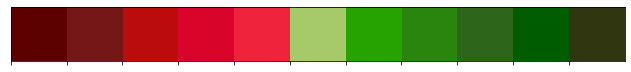

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib.colors

colors = ["#5C0000","#751717","#BA0C0C","#d90429","#ef233c", "#a6ca69", "#27a300", "#2a850e", "#2d661b", "#005c00", "#30360f"]
colors2 = ["#F2ECC6","#D5D68A","#A6AD3C","#798517","#D72A2B"]
cmap = matplotlib.colors.ListedColormap(colors2)

sns.palplot(sns.color_palette(colors))

plt.rcParams['figure.figsize'] = (16,9)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams["axes.facecolor"] ="white"
plt.rcParams['axes.linewidth'] = 1.5
plt.rcParams['figure.frameon'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams["font.family"] = "monospace";

Dataset:
- case_id
- Hospital
- Hospital_type
- Hospital_city
- Hospital_region
- Available-Extra-Rooms-in-Hospital | Number of Extra rooms available in the Hospital
- Department | Department overlooking the case | ['radiotherapy' 'anesthesia' 'gynecology' 'TB & Chest disease' 'surgery']
- Ward_Type | ['R' 'S' 'Q' 'P' 'T' 'U']
- Ward_Facility | ['F' 'E' 'D' 'B' 'A' 'C']
- Bed_Grade | Condition of Bed in the Ward
- patientid
- CityCodePatient | City Code for the patient
- Type of Admission | Admission Type registered by the Hospital | ['Emergency' 'Trauma' 'Urgent']
- Illness_Severity | Severity of the illness recorded at the time of admission | ['Extreme' 'Moderate' 'Minor']
- Patient_Visitors
- Age | Age category | ['51-60' '71-80' '31-40' '41-50' '81-90' '61-70' '21-30' '11-20' '0-10' '91-100']
- Admission_Deposit |Deposit at the Admission Time
- Stay_Days | Stay Days by the patient (target) | ['0-10' '41-50' '31-40' '11-20' '51-60' '21-30' '71-80'
'More than 100 Days' '81-90' '61-70' '91-100']

In [2]:
df = pd.read_csv('host_train.csv', index_col='case_id')

In [3]:
df.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
case_id,,,,,,,,,,,,,,,,,
1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
len(df)

318438

### EDA

In [5]:
df.isnull().sum()

Hospital                                0
Hospital_type                           0
Hospital_city                           0
Hospital_region                         0
Available_Extra_Rooms_in_Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility                           0
Bed_Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Illness_Severity                        0
Patient_Visitors                        0
Age                                     0
Admission_Deposit                       0
Stay_Days                               0
dtype: int64

In [6]:
df['Bed_Grade'] = df['Bed_Grade'].fillna(df['Bed_Grade'].mean())

In [7]:
df.describe(include=['O'])

,Department,Ward_Type,Ward_Facility,Type of Admission,Illness_Severity,Age,Stay_Days
count,318438,318438,318438,318438,318438,318438,318438
unique,5,6,6,3,3,10,11
top,gynecology,R,F,Trauma,Moderate,41-50,21-30
freq,249486,127947,112753,152261,175843,63749,87491


<AxesSubplot:xlabel='Stay_Days', ylabel='count'>

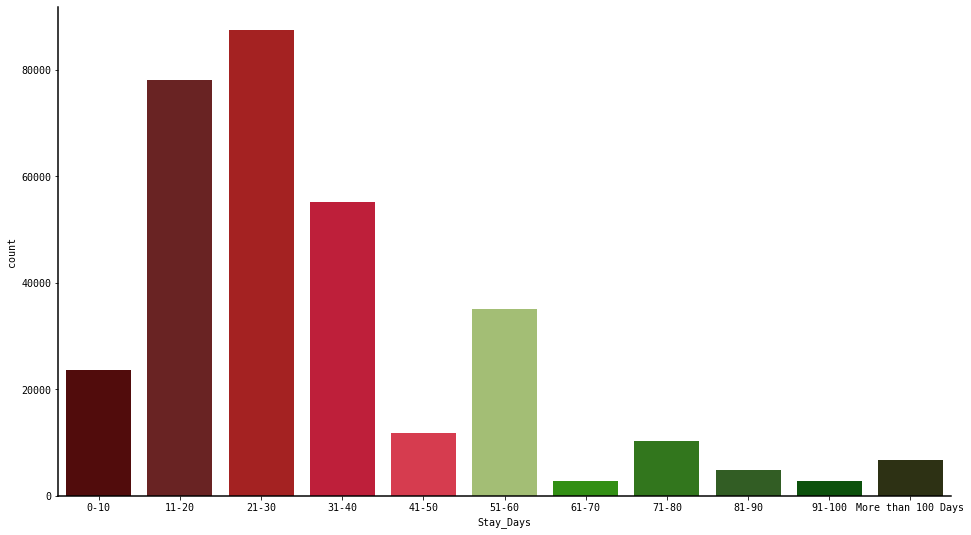

In [8]:
plt.figure()
sns.countplot(x=df["Stay_Days"], 
              order=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100','More than 100 Days'],
              palette=colors)


In [9]:
df['Stay_Days'] = df['Stay_Days'].replace({"0-10": 0, "11-20": 1, "21-30": 3, '31-40': 4,'41-50': 5,'51-60':6,'61-70':7,'71-80':8,'81-90':9,'91-100':10,'More than 100 Days':11})

In [10]:
df['Age'] = df['Age'].replace({"0-10": 0, "11-20": 1, "21-30": 3, '31-40': 4,'41-50': 5,'51-60':6,'61-70':7,'71-80':8,'81-90':9,'91-100':10})

<AxesSubplot:xlabel='Age', ylabel='count'>

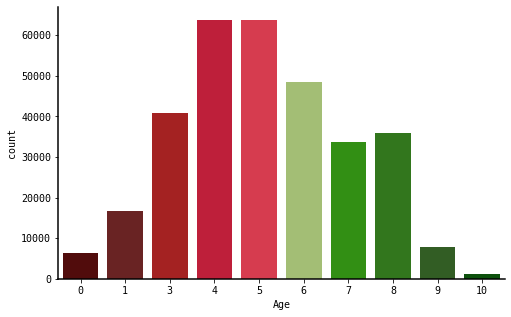

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["Age"], palette=colors)

In [12]:
categorical = ['Hospital',
 'Hospital_type',
 'Hospital_city',
 'Hospital_region',
 'Department',
 'Ward_Type',
 'Ward_Facility',
 'City_Code_Patient',
 'Type of Admission',
 'Illness_Severity']
numerical = ['Patient_Visitors', 'Admission_Deposit', 'Age', 'Available_Extra_Rooms_in_Hospital', 'Bed_Grade']

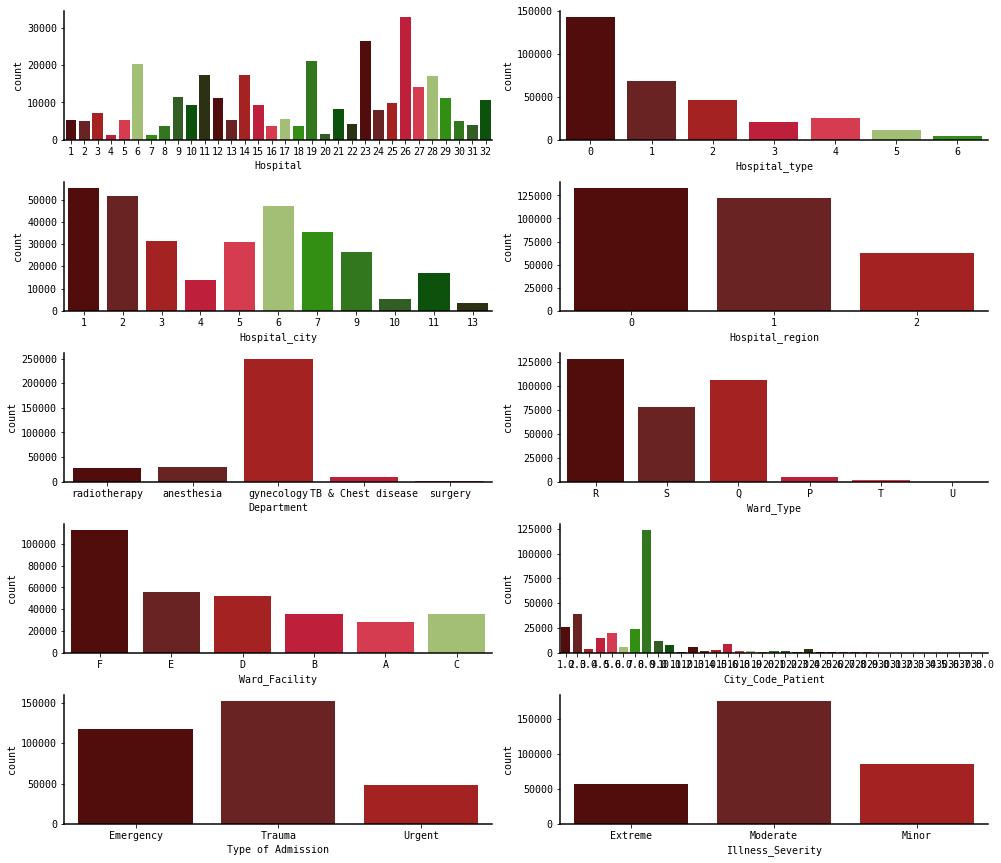

In [13]:
plt.figure(figsize=(14,14))
for (index, column) in enumerate(categorical):
    plt.subplot(6, 2, index + 1)
    sns.countplot(data=df[categorical], x=column, palette=colors)
    plt.xlabel(column)
    plt.ylabel("count")

plt.tight_layout(pad = 1.0)
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

for col in categorical:
    le = LabelEncoder() 
    df[col]  = le.fit_transform(df[col].astype(str)) 
df.head()

,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
case_id,,,,,,,,,,,,,,,,,
1,30,2,5,2,3,3,2,5,2.0,31397,34,0,0,2,6,4911.0,0
2,11,2,7,2,2,3,3,5,2.0,31397,34,1,0,2,6,5954.0,5
3,1,4,0,0,2,1,3,4,2.0,31397,34,1,0,2,6,4745.0,4
4,18,1,4,1,2,3,2,3,2.0,31397,34,1,0,2,6,7272.0,5
5,18,1,4,1,2,3,3,3,2.0,31397,34,1,0,2,6,5558.0,5


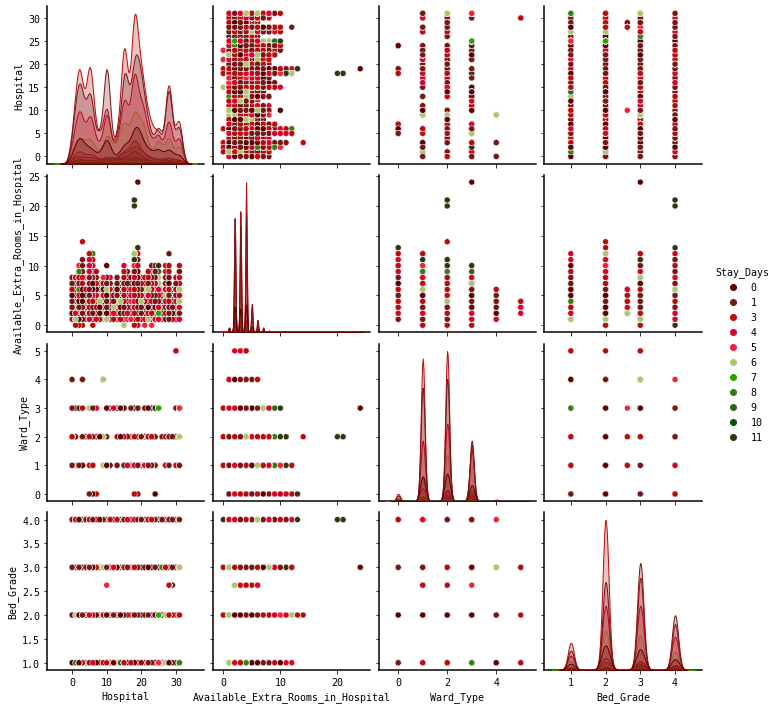

In [15]:
sns.pairplot(df[["Hospital","Stay_Days", "Available_Extra_Rooms_in_Hospital", "Ward_Type", "Bed_Grade"]], hue="Stay_Days", palette=colors)

<AxesSubplot:>

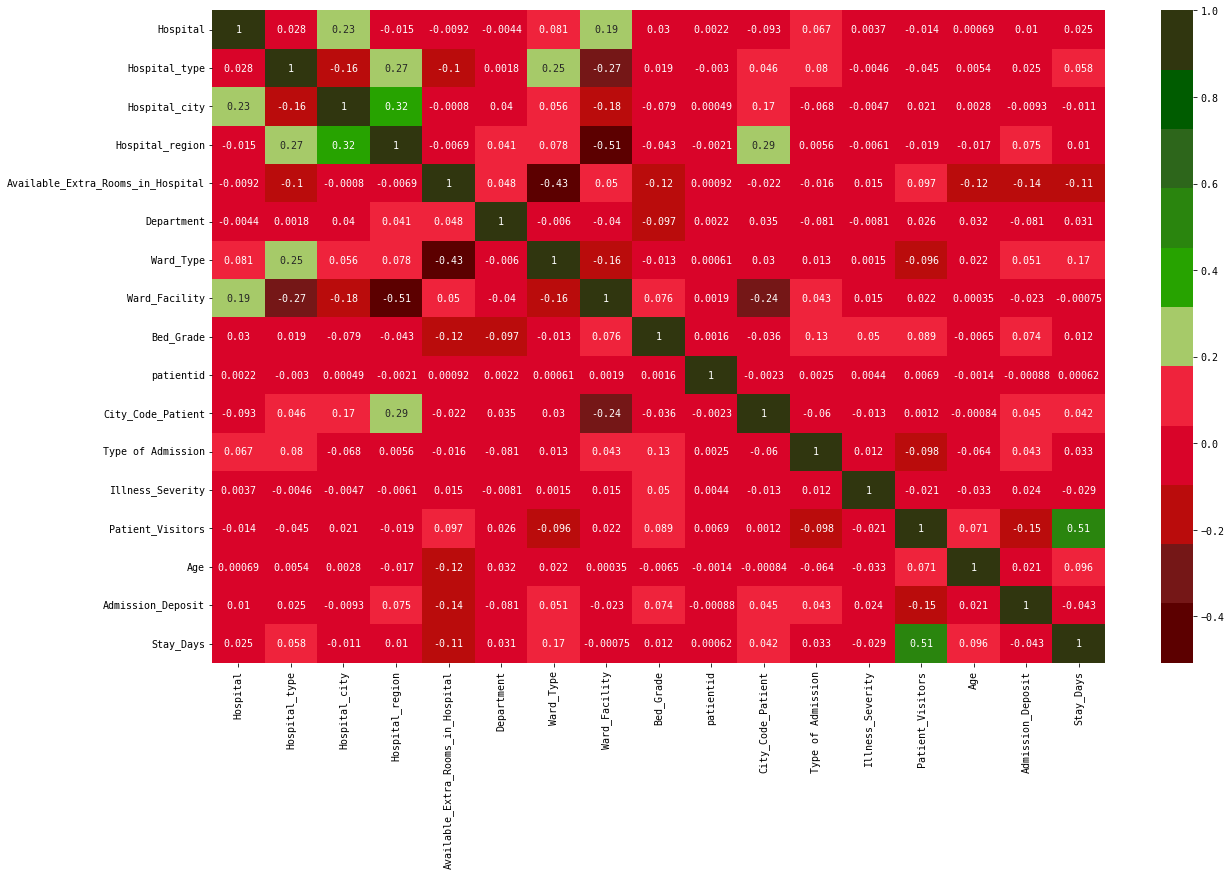

In [16]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True, cmap=colors)

- Чем больше дней пребывания, тем больше посетителей и лучший Ward_Type
- Различные больницы и отделения почти одинаковы в эффективности лечения
- Available_Extra_Rooms_in_Hospital имеют отрицательную корреляцию с днями пребывания

### Разбиение данных и масштабирование

In [17]:
frames = [0] * (len(categorical) + 1)
for (i, feature) in enumerate(categorical):
    frames[i] = pd.get_dummies(df[feature], prefix=feature)
frames[len(categorical)] = df
df = pd.concat(frames, axis = 1)
df = df.drop(columns=categorical)

In [18]:
from sklearn.model_selection import train_test_split

y = df["Stay_Days"]
X = df.drop(columns=["Stay_Days"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
acc = {}
time = {}

### Logistic Regression

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {'C': np.logspace(-5, 3, 20)}
searcher = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, scoring="roc_auc_ovr", cv=5)
searcher.fit(X_train_scaled, y_train)

best_C = searcher.best_params_["C"]

In [53]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate

model = LogisticRegression(C=best_C, max_iter=1000)
model = OneVsRestClassifier(model).fit(X_train_scaled, y_train)
acc["Logistic Regression (OneVsRest)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["Logistic Regression (OneVsRest)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['Logistic Regression (OneVsRest)']}")
print(f"Fit time: {time['Logistic Regression (OneVsRest)']}")

Accuracy: 0.4489525741955757
Fit time: 19.262237820338758


In [54]:
model = LogisticRegression(C=best_C, max_iter=1000)
model = OneVsOneClassifier(model).fit(X_train_scaled, y_train)
acc["Logistic Regression (OneVsOne)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["Logistic Regression (OneVsOne)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['Logistic Regression (OneVsOne)']}")
print(f"Fit time: {time['Logistic Regression (OneVsOne)']}")

Accuracy: 0.4538438495974425
Fit time: 20.713671226662406


In [55]:
model = LogisticRegression(C=best_C, max_iter=1000)
model = OutputCodeClassifier(model).fit(X_train_scaled, y_train)
acc["Logistic Regression (OutputCode)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["Logistic Regression (OutputCode)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['Logistic Regression (OutputCode)']}")
print(f"Fit time: {time['Logistic Regression (OutputCode)']}")

Accuracy: 0.412525177069768
Fit time: 35.7872964221219


### SVM

In [56]:
from sklearn.svm import SVC

C = [0.1, 0.25, 0.5, 0.75, 1, 2]
kernel = ["linear", "rbf"]
gamma = ["scale", "auto", 0.0001, 0.001, 0.01, 0.1, 1]
param_grid=dict(kernel=kernel, C=C, gamma=gamma)

searcher = GridSearchCV(SVC(random_state=11, probability=True), param_grid, scoring="roc_auc_ovr", cv=5)
searcher.fit(X_train_scaled, y_train)
best_C = searcher.best_params_["C"]
best_gamma = searcher.best_params_['gamma']
best_kernel = searcher.best_params_['kernel']

In [57]:
model = SVC(C=best_C, random_state=11, gamma=best_gamma, kernel=best_kernel, probability=True)
model = OneVsRestClassifier(model).fit(X_train_scaled, y_train)
acc["SVM (OneVsRest)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["SVM (OneVsRest)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['SVM (OneVsRest)']}")
print(f"Fit time: {time['SVM (OneVsRest)']}")

Accuracy: 0.3913522122901614
Fit time: 757.1433767677247


In [58]:
model = SVC(C=best_C, random_state=11, gamma=best_gamma, kernel=best_kernel, probability=True)
model = OneVsOneClassifier(model).fit(X_train_scaled, y_train)
acc["SVM (OneVsOne)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["SVM (OneVsOne)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['SVM (OneVsOne)']}")
print(f"Fit time: {time['SVM (OneVsOne)']}")

Accuracy: 0.43331417541625916
Fit time: 160.2973650076896


In [59]:
model = SVC(C=best_C, random_state=11, gamma=best_gamma, kernel=best_kernel, probability=True)
model = OutputCodeClassifier(model).fit(X_train_scaled, y_train)
acc["SVM (OutputCode)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["SVM (OutputCode)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['SVM (OutputCode)']}")
print(f"Fit time: {time['SVM (OutputCode)']}")

Accuracy: 0.4271055847189041
Fit time: 1307.6643491920618


### KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.arange(3, 11, 2)
searcher = GridSearchCV(KNeighborsClassifier(), [{"n_neighbors": n_neighbors}], scoring="roc_auc_ovr",cv=5)
searcher.fit(X_train_scaled, y_train)

best_n_neighbors = searcher.best_params_["n_neighbors"]

In [61]:
model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
model = OneVsRestClassifier(model).fit(X_train_scaled, y_train)
acc["KNN (OneVsRest)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["KNN (OneVsRest)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['KNN (OneVsRest)']}")
print(f"Fit time: {time['KNN (OneVsRest)']}")

Accuracy: 0.35565434071987456
Fit time: 0.8038999946260291


In [62]:
model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
model = OneVsOneClassifier(model).fit(X_train_scaled, y_train)
acc["KNN (OneVsOne)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["KNN (OneVsOne)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['KNN (OneVsOne)']}")
print(f"Fit time: {time['KNN (OneVsOne)']}")

Accuracy: 0.3806325348370362
Fit time: 3.445606038061561


In [63]:
model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
model = OutputCodeClassifier(model).fit(X_train_scaled, y_train)
acc["KNN (OutputCode)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["KNN (OutputCode)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['KNN (OutputCode)']}")
print(f"Fit time: {time['KNN (OutputCode)']}")

Accuracy: 0.36667177654758143
Fit time: 2.0284993643783764


### Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

searcher = GridSearchCV(GaussianNB(), [{"var_smoothing": np.logspace(0, -6, num=50)}], scoring="roc_auc_ovr", cv=5)
searcher.fit(X_train_scaled, y_train)
best_var_smoothing = searcher.best_params_["var_smoothing"]

In [65]:
model = GaussianNB(var_smoothing=best_var_smoothing)
model = OneVsRestClassifier(model).fit(X_train_scaled, y_train)
acc["NB (OneVsRest)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["NB (OneVsRest)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['NB (OneVsRest)']}")
print(f"Fit time: {time['NB (OneVsRest)']}")

Accuracy: 0.26586582435277717
Fit time: 6.002555990219117


In [66]:
model = GaussianNB(var_smoothing=best_var_smoothing)
model = OneVsOneClassifier(model).fit(X_train_scaled, y_train)
acc["NB (OneVsOne)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["NB (OneVsOne)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['NB (OneVsOne)']}")
print(f"Fit time: {time['NB (OneVsOne)']}")

Accuracy: 0.3109449601397386
Fit time: 4.545320892333985


In [67]:
model = GaussianNB(var_smoothing=best_var_smoothing)
model = OutputCodeClassifier(model).fit(X_train_scaled, y_train)
acc["NB (OutputCode)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["NB (OutputCode)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['NB (OutputCode)']}")
print(f"Fit time: {time['NB (OutputCode)']}")

Accuracy: 0.32952773868514745
Fit time: 6.424894762039185


### Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

depths = [2, 3, 4, 5, 10, 20]
min_samples_splits = [2, 4, 5, 10]
min_samples_leafs = [1, 2, 4, 6]

searcher = GridSearchCV(
    DecisionTreeClassifier(),
    [{"max_depth": depths, "min_samples_split": min_samples_splits, "min_samples_leaf": min_samples_leafs}],
    scoring="roc_auc_ovr",
    cv=5
)
searcher.fit(X_train_scaled, y_train)

best_max_depth = searcher.best_params_["max_depth"]
best_min_samples_split = searcher.best_params_["min_samples_split"]
best_min_samples_leaf = searcher.best_params_["min_samples_leaf"]

In [69]:
model = DecisionTreeClassifier(max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,
                            min_samples_leaf=best_min_samples_leaf)
model = OneVsRestClassifier(model).fit(X_train_scaled, y_train)
acc["DecisionTree (OneVsRest)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["DecisionTree (OneVsRest)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['DecisionTree (OneVsRest)']}")
print(f"Fit time: {time['DecisionTree (OneVsRest)']}")

Accuracy: 0.4594737253702373
Fit time: 49.95699381828308


In [70]:
model = DecisionTreeClassifier(max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,
                            min_samples_leaf=best_min_samples_leaf)
model = OneVsOneClassifier(model).fit(X_train_scaled, y_train)
acc["DecisionTree (OneVsOne)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["DecisionTree (OneVsOne)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['DecisionTree (OneVsOne)']}")
print(f"Fit time: {time['DecisionTree (OneVsOne)']}")

Accuracy: 0.4596856962281697
Fit time: 27.55286011695862


In [71]:
model = DecisionTreeClassifier(max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,
                            min_samples_leaf=best_min_samples_leaf)
model = OutputCodeClassifier(model).fit(X_train_scaled, y_train)
acc["DecisionTree (OutputCode)"] = accuracy_score(y_test, model.predict(X_test_scaled))
time["DecisionTree (OutputCode)"] = cross_validate(model, X_train_scaled, y_train, cv=5)["fit_time"].mean()
print(f"Accuracy: {acc['DecisionTree (OutputCode)']}")
print(f"Fit time: {time['DecisionTree (OutputCode)']}")

Accuracy: 0.4485611515729756
Fit time: 62.31571202278137


### Результаты

<AxesSubplot:xlabel='Accuracy', ylabel='Algo'>

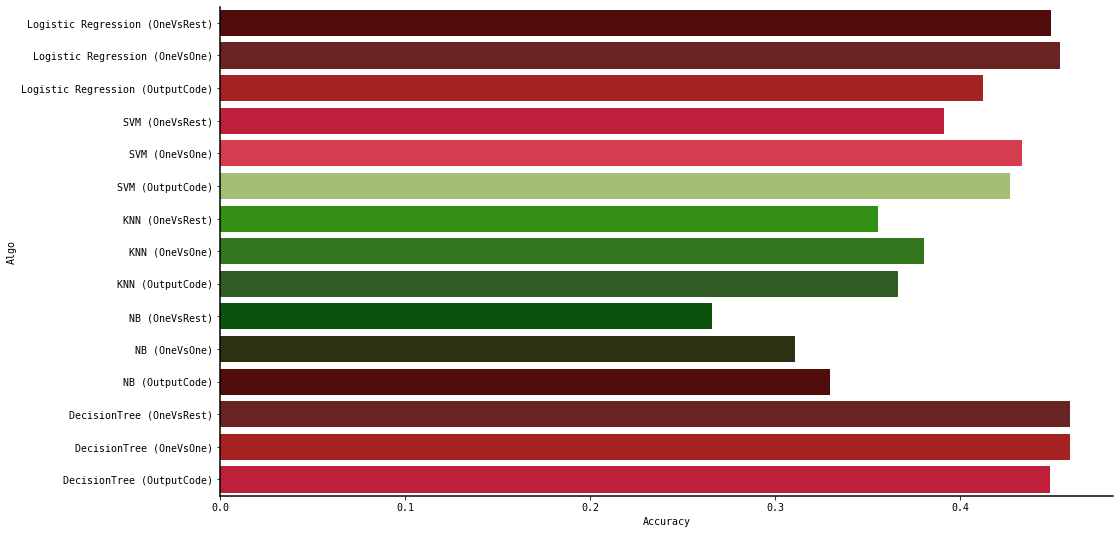

In [72]:
time_df = pd.DataFrame.from_dict({key: [value] for key, value in time.items()})
acc_df = pd.DataFrame.from_dict({key: [value] for key, value in acc.items()})
plt.ylabel("Algo")
plt.xlabel("Accuracy")
sns.barplot(x=acc_df.values[0], y=acc_df.columns, palette=colors)

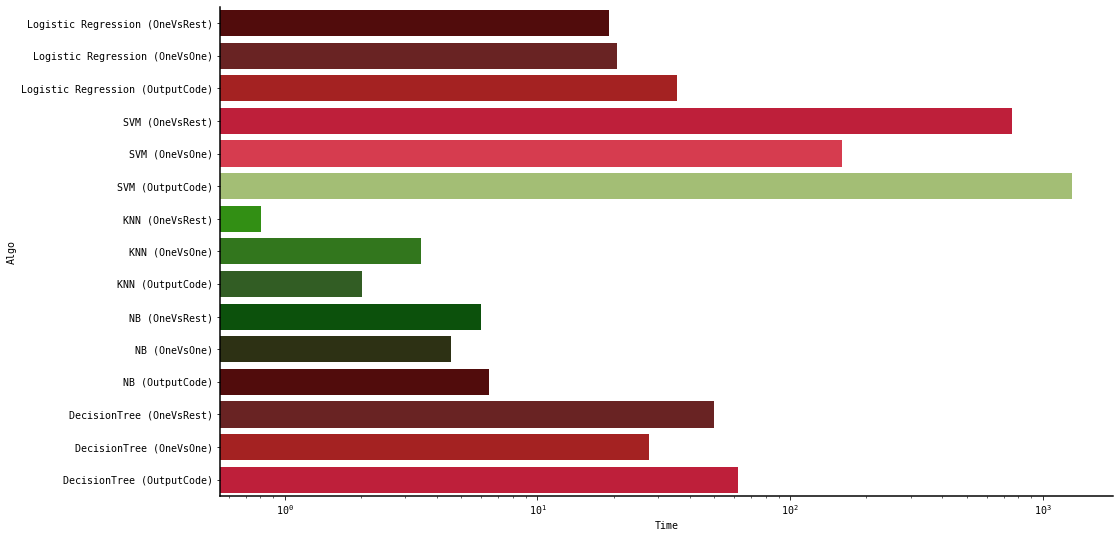

In [73]:
plt.ylabel("Algo")
plt.xlabel("Time")
g = sns.barplot(x=time_df.values[0], y=time_df.columns, palette=colors)
g.set_xscale("log")

Выводы:
- Точность всех алгоритмов и стратегий не совсем хорошая, что вызвано слабой корреляцией данных с таргетным признаком
- Наилучшей по точности стратегией была OneVsOne
- Медленнее других была OutputCode
- Более точным были алгоритмы Decision Tree и Logistic Regression
- Значительно медленне отработал алгоритм SVM